# 【实验】第4.3节过拟合现象可视化

## 实验介绍

在本节内容中，我们将详细介绍如何来模拟模型过拟合现象，即对不同模型的预测的结果进行可视化，以此来探索不同情况下模型的过拟合状况。

### 知识点

- 数据集构建及可视化
- 多项式回归模型实现
- 模型训练与可视化

## 1.构建测试数据集

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


def MSE(y, y_pre):
    return np.mean((y - y_pre) ** 2)


def make_data():
    np.random.seed(10)
    x_train = np.linspace(0, 2 * np.pi, 12)  # 训练样本
    x_test = np.linspace(0, 2 * np.pi, 1000)
    y_test = np.sin(x_test)
    y_train = np.random.uniform(-0.3, 0.3, 12) + np.sin(x_train)
    return x_test.reshape(-1, 1), y_test, x_train.reshape(-1, 1), y_train

## 2.可视化数据集

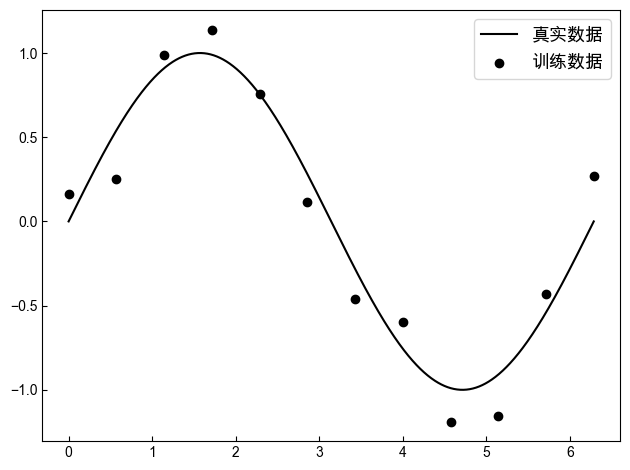

In [4]:
def visualization(x_test, y_test, x_train, y_train):
    plt.rcParams['ytick.direction'] = 'in'  # 刻度向内
    plt.rcParams['xtick.direction'] = 'in'  # 刻度向内
    plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
    plt.plot(x_test, y_test, label='真实数据',c='black')
    plt.scatter(x_train, y_train, c='black', label='训练数据')
    plt.tight_layout()  # 调整子图间距
    # plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
    plt.legend(fontsize=13)
    plt.show
if __name__ == '__main__':
    x_test, y_test, x_train, y_train = make_data()
    visualization(x_test, y_test, x_train, y_train)  # 可视化训练样本

## 3.定义单个模型训练过程

In [5]:
def polynomial_regression(x_train, y_train, x_test, y_test, degree=2):
    poly = PolynomialFeatures(include_bias=False, degree=degree)
    x_mul = poly.fit_transform(x_train)
    model = LinearRegression()

    model.fit(x_mul, y_train)

    x_mul = poly.transform(x_test)
    y_pre = model.predict(x_mul)
    r2 = model.score(x_mul, y_test)
    return y_pre, r2

## 4.定义所有模型训练过程

In [6]:
def train(x_train, y_train):
    y_pre_1, score_1 = polynomial_regression(x_train, y_train, x_train, y_train, degree=1)
    y_pre_5, score_5 = polynomial_regression(x_train, y_train, x_train, y_train, degree=5)
    y_pre_10, score_10 = polynomial_regression(x_train, y_train, x_train, y_train, degree=10)

    plt.scatter(x_train, y_train, label='训练数据',c='black')
    plt.plot(x_train, y_pre_1, linestyle='--', label=r'$degree = 1, R^2 = {}$'.format(round(score_1, 2)),c='black')
    plt.plot(x_train, y_pre_5, label=r'$degree = 5, R^2 = {}$'.format(round(score_5, 2)),c='black')
    plt.plot(x_train, y_pre_10, linestyle='dashdot',
             label=r'$degree = 10, R^2 = {}$'.format(round(score_10, 2)),c='black')
    plt.tight_layout()  # 调整子图间距
    # plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
    plt.legend(fontsize=13)
    plt.show()

## 5.预测并可视化每个模型的预测结果

In [7]:
def prediction(x_test, y_test, x_train, y_train):
    y_pre_1, r2_1 = polynomial_regression(x_train, y_train, x_test, y_test, degree=1)
    y_pre_5, r2_5 = polynomial_regression(x_train, y_train, x_test, y_test, degree=5)
    y_pre_10, r2_10 = polynomial_regression(x_train, y_train, x_test, y_test, degree=10)
    plt.rcParams['ytick.direction'] = 'in'  # 刻度向内
    plt.rcParams['xtick.direction'] = 'in'  # 刻度向内
    plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
    plt.scatter(x_train, y_train, c='black', label='训练数据')
    plt.plot(x_test, y_pre_1, linestyle='--', label=r'$degree = 1, R^2 = {}$'.format(round(r2_1, 2)),c='black')
    plt.plot(x_test, y_pre_5, label=r'$degree = 5, R^2 = {}$'.format(round(r2_5, 2)),c='black')
    plt.plot(x_test, y_pre_10, linestyle='dashdot', label=r'$degree = 10, R^2 = {}$'.format(round(r2_10, 2)),c='black')
    plt.tight_layout()  # 调整子图间距
    # plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
    plt.legend(fontsize=13)
    plt.show()


## 6.运行结果并可视化

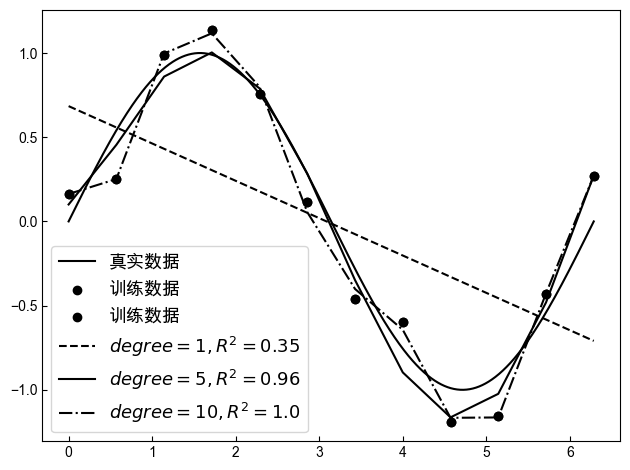

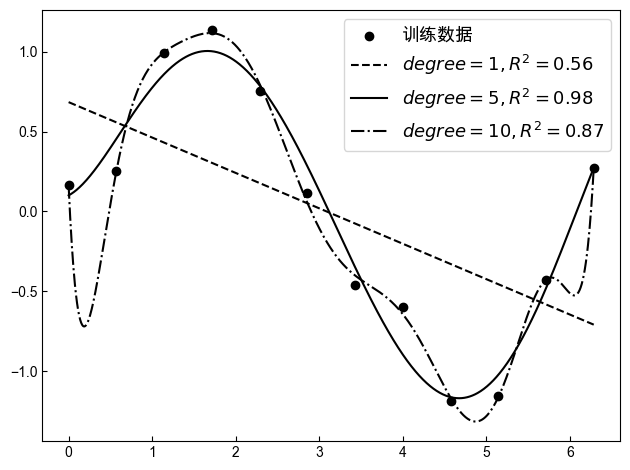

In [8]:
if __name__ == '__main__':
    x_test, y_test, x_train, y_train = make_data()
    visualization(x_test, y_test, x_train, y_train)  # 可视化训练样本
    train(x_train, y_train)  # 可视化拟合后的曲线
    prediction(x_test, y_test, x_train, y_train)  # 预测新样本的输出

## 实验总结

在本节内容中，我们详细介绍了如何来模拟模型的过拟合现象，即对不同模型的预测结果进行可视化，以此来探索不同情况下模型的过拟合程度状况。